# alpha vantage data exploration

In [1]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import multiprocessing
import datetime as dt
import pandas as pd
import numpy as np
import pprint
import json
import os

with open('api_key.json', 'r') as f:
    api = json.load(f)
    api_key = api['api_key']
    
pp = pprint.PrettyPrinter(indent = 3)
print('imported modules.')

imported modules.


## read in nasdaq .csv

In [3]:
nasdaq = pd.read_csv('nasdaq_screener.csv')
nasdaq.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$133.28,1.31,0.993%,4.061008e+10,United States,1999.0,2121339,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$32.84,-0.55,-1.647%,6.118788e+09,NaN,2016.0,6018047,Basic Industries,Aluminum
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.87,-0.03,-0.303%,1.233873e+09,NaN,2021.0,251428,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$3.09,-0.28,-8.309%,9.687305e+07,China,NaN,1646131,Consumer Services,Other Consumer Services
4,AACQ,Artius Acquisition Inc. Class A Common Stock,$10.04,-0.12,-1.181%,9.092475e+08,United States,2020.0,1312002,Basic Industries,Major Chemicals


## get timeseries for each stock (slow way)

In [4]:
def get_ts(symbol):
    
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
    fname = "./data_dump/{}_data.csv".format(symbol)
    data.to_csv(fname)

In [7]:
my_symbol = nasdaq.Symbol[2]

In [8]:
get_ts(my_symbol)

In [4]:
tickers = nasdaq.Symbol
tickers = [a for a in tickers if '/' not in a]
tickers = [a for a in tickers if '^' not in a]
tickers = [a for a in tickers if 'AMP' not in a]

## output to .csv for each stock

In [8]:
for s in tqdm(nasdaq.Symbol):
    
    try:
        y = get_ts(s)
    
    except:
        print('problem w/ api call for {}.'.format(s))

problem w/ api call for AAIC^B.
problem w/ api call for AAIC^C.
problem w/ api call for ABR^A.
problem w/ api call for ABR^B.
problem w/ api call for ABR^C.
problem w/ api call for ACR^C.
problem w/ api call for AEL^A.
problem w/ api call for AEL^B.
problem w/ api call for AGM^C.
problem w/ api call for AGM^D.
problem w/ api call for AGM^E.
problem w/ api call for AGM^F.
problem w/ api call for AGO^B.
problem w/ api call for AGO^E.
problem w/ api call for AGO^F.
problem w/ api call for AHH^A.
problem w/ api call for AHL^C.
problem w/ api call for AHL^D.
problem w/ api call for AHL^E.
problem w/ api call for AHT^D.
problem w/ api call for AHT^F.
problem w/ api call for AHT^G.
problem w/ api call for AHT^H.
problem w/ api call for AHT^I.
problem w/ api call for AIG^A.
problem w/ api call for AKO/A.
problem w/ api call for AKO/B.
problem w/ api call for AL^A.
problem w/ api call for ALIN^A.
problem w/ api call for ALIN^B.
problem w/ api call for ALIN^E.
problem w/ api call for ALL^B.
prob

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x000002733827BEE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000027335F136D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x000002733AC0AF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x000002733AB5B610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000027340CF8DC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000027340CE6400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000027340CE6970>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x000002733AC7EB20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x000002733AC840D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x000002733AC606D0>


problem w/ api call for CTA^A.
problem w/ api call for CTA^B.
problem w/ api call for CUBI^C.
problem w/ api call for CUBI^D.
problem w/ api call for CUBI^E.
problem w/ api call for CUBI^F.
problem w/ api call for DCP^B.
problem w/ api call for DCP^C.
problem w/ api call for DHR^A.
problem w/ api call for DHR^B.
problem w/ api call for DLNG^A.
problem w/ api call for DLNG^B.
problem w/ api call for DLR^C.
problem w/ api call for DLR^J.
problem w/ api call for DLR^K.
problem w/ api call for DLR^L.
problem w/ api call for DRH^A.
problem w/ api call for DS^B.
problem w/ api call for DS^C.
problem w/ api call for DS^D.
problem w/ api call for DSX^B.
problem w/ api call for DTLA^.
problem w/ api call for DUK^A.
problem w/ api call for DX^C.
problem w/ api call for ECC           .
problem w/ api call for ECF^A.
problem w/ api call for ECOM          .
problem w/ api call for EFC^A.
problem w/ api call for ENR^A.
problem w/ api call for EP^C.
problem w/ api call for EPR^C.
problem w/ api call 

problem w/ api call for SCHW^D.
problem w/ api call for SCHW^J.
problem w/ api call for SF^A.
problem w/ api call for SF^B.
problem w/ api call for SF^C.
problem w/ api call for SHO^E.
problem w/ api call for SHO^F.
problem w/ api call for SITC^A.
problem w/ api call for SLG^I.
problem w/ api call for SNV^D.
problem w/ api call for SNV^E.
problem w/ api call for SPE^B.
problem w/ api call for SPG^J.
problem w/ api call for SPLP^A.
problem w/ api call for SR^A.
problem w/ api call for SRC^A.
problem w/ api call for SRE^B.
problem w/ api call for SRG^A.
problem w/ api call for STAR          .
problem w/ api call for STAR^D.
problem w/ api call for STAR^G.
problem w/ api call for STAR^I.
problem w/ api call for STL^A.
problem w/ api call for STT^D.
problem w/ api call for STT^G.
problem w/ api call for STZ/B.
problem w/ api call for SYF^A.
problem w/ api call for T^A.
problem w/ api call for T^C.
problem w/ api call for TDS^U.
problem w/ api call for TFC^H.
problem w/ api call for TFC^I.


## download data and output .csv (multiprocessing)

In [ ]:
def download_data(pool_id, symbols):
    for symbol in symbols:
        print("[{:02}]: {}".format(pool_id, symbol))
        get_ts(symbol)

tickers = nasdaq.Symbol
tickers = [a for a in tickers if '/' not in a]
tickers = [a for a in tickers if '^' not in a]
tickers = [a for a in tickers if 'AMP' not in a]

# PROCESSES = multiprocessing.cpu_count()
PROCESSES = 8  # number of parallel process
CHUNKS = 6  # one process handle n symbols

# create a list of n sublist
tickers = [tickers[i:i + CHUNKS] for i in range(0, len(tickers), CHUNKS)]

with multiprocessing.Pool(PROCESSES) as pool:
    pool.starmap(download_data, enumerate(tickers, start=1)) 

## get years of data per stock

In [5]:
tickers = nasdaq.Symbol
tickers = [a for a in tickers if '/' not in a]
tickers = [a for a in tickers if '^' not in a]
tickers = [a for a in tickers if 'AMP' not in a]
symbol = tickers[0]

def get_years(symbol):
    fname = "./data_dump/{}_data.csv".format(symbol)
    data = pd.read_csv(fname)
    data.date = pd.to_datetime(data.date)
    last_date = np.max(data.date)
    first_date = np.min(data.date)
    years = round((last_date - first_date).days / 365,2)
    return(years)

#year = get_years(symbol)
for s in tqdm(tickers):
    try:
        get_years(s)
    except:
        print('error with symbol {}'.format(s))

error with symbol AKU
error with symbol ATSPT


## read years from script output

In [3]:
years = pd.read_csv('year_calc_combined.csv', header = None, names = ['Symbol', 'Years'])
years.head()

,Symbol,Years
0,A,21.42
1,AA,4.46
2,AAC,6.54
3,AACG,13.22
4,AACQ,0.61


In [6]:
final = pd.concat([nasdaq, years], axis = 1, keys = 'Symbol', join = 'inner')
final.to_csv('nasdaq_years.csv', index = False)

In [7]:
final.head()

S                                                               \
  Symbol                                               Name Last Sale   
0      A             Agilent Technologies Inc. Common Stock   $133.28   
1     AA                    Alcoa Corporation Common Stock     $32.84   
2    AAC  Ares Acquisition Corporation Class A Ordinary ...     $9.87   
3   AACG   ATA Creativity Global American Depositary Shares     $3.09   
4   AACQ       Artius Acquisition Inc. Class A Common Stock    $10.04   

                                                                      \
  Net Change % Change    Market Cap        Country IPO Year   Volume   
0       1.31   0.993%  4.061008e+10  United States   1999.0  2121339   
1      -0.55  -1.647%  6.118788e+09            NaN   2016.0  6018047   
2      -0.03  -0.303%  1.233873e+09            NaN   2021.0   251428   
3      -0.28  -8.309%  9.687305e+07          China      NaN  1646131   
4      -0.12  -1.181%  9.092475e+08  United States   2020.0  1312002   

                                                                            y  \
              Sector                                          Industry Symbol   
0      Capital Goods  Biotechnology: Laboratory Analytical Instruments      A   
1   Basic Industries                                          Aluminum     AA   
2            Finance                                 Business Services    AAC   
3  Consumer Services                           Other Consumer Services   AACG   
4   Basic Industries                                   Major Chemicals   AACQ   

          
   Years  
0  21.42  
1   4.46  
2   6.54  
3  13.22  
4   0.61

In [71]:
def data_years(value):
    yrs = final[('y', 'Years')]
    subset = [y >= value for y in yrs]
    n = final[subset].shape[0]
    return(n)

data_years(20)

2113

## Get exchange for each stock

In [25]:
test = final['S']['Symbol'][4]
test

'AACQ'

In [47]:
def get_exchange(symbol):
    ts = TimeSeries(key=api_key, output_format='pandas') 
    overview = FundamentalData.get_company_overview(ts,symbol=symbol)
    overview_df = pd.DataFrame(list(overview)[0])
    exchange = overview_df['Exchange'][0]
    return(exchange)

In [51]:
exchanges = []
for s in tqdm(final['S']['Symbol']):
    try:
        e = get_exchange(s)
        exchanges.append(e)
    except:
        exchanges.append('NA')


In [68]:
exchange_data = pd.DataFrame(zip(list(final['S']['Symbol']), exchanges), columns = ['Symbol', 'Exchange'])
exchange_data.to_csv('exchange_data.csv', index = False)

In [66]:
new_final = final.join(exchange_data)
new_final.head()

C:\ProgramData\Miniconda3\envs\alpha\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(S, Symbol)","(S, Name)","(S, Last Sale)","(S, Net Change)","(S, % Change)","(S, Market Cap)","(S, Country)","(S, IPO Year)","(S, Volume)","(S, Sector)","(S, Industry)","(y, Symbol)","(y, Years)",Symbol,Exchange
0,A,Agilent Technologies Inc. Common Stock,$133.28,1.31,0.993%,4.061008e+10,United States,1999.0,2121339,Capital Goods,Biotechnology: Laboratory Analytical Instruments,A,21.42,A,NYSE
1,AA,Alcoa Corporation Common Stock,$32.84,-0.55,-1.647%,6.118788e+09,NaN,2016.0,6018047,Basic Industries,Aluminum,AA,4.46,AA,NYSE
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.87,-0.03,-0.303%,1.233873e+09,NaN,2021.0,251428,Finance,Business Services,AAC,6.54,AAC,NYSE
3,AACG,ATA Creativity Global American Depositary Shares,$3.09,-0.28,-8.309%,9.687305e+07,China,NaN,1646131,Consumer Services,Other Consumer Services,AACG,13.22,AACG,NASDAQ
4,AACQ,Artius Acquisition Inc. Class A Common Stock,$10.04,-0.12,-1.181%,9.092475e+08,United States,2020.0,1312002,Basic Industries,Major Chemicals,AACQ,0.61,AACQ,NASDAQ


In [67]:
new_final.to_csv('nasdaq_exchanges.csv', index = False)

## random sample 500 stocks

In [4]:
sample_output = np.random.choice(nasdaq.Symbol, size = 500, replace = False)

## pull time series based on nasdaq .csv

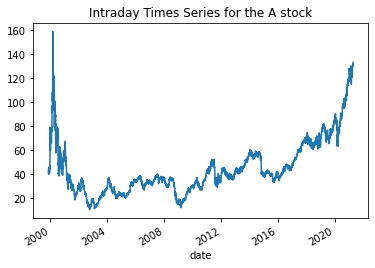

In [40]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol=my_symbol, outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the {} stock'.format(my_symbol))
plt.show()

In [31]:
data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-04-15,132.00,133.940,132.0000,133.28,133.280000,2115571.0,0.0,1.0
2021-04-14,133.10,133.225,130.9610,131.97,131.970000,1499287.0,0.0,1.0
2021-04-13,131.60,133.267,131.4700,132.97,132.970000,1593774.0,0.0,1.0
2021-04-12,131.44,132.180,130.8400,131.27,131.270000,1166306.0,0.0,1.0
2021-04-09,131.46,131.920,130.7343,131.91,131.910000,1552194.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-24,40.13,41.940,40.0000,41.06,27.161863,3464400.0,0.0,1.0
1999-11-23,42.50,43.630,40.2500,40.25,26.626035,4274400.0,0.0,1.0
1999-11-22,41.31,44.000,40.0600,44.00,29.106721,4705200.0,0.0,1.0


## download time series

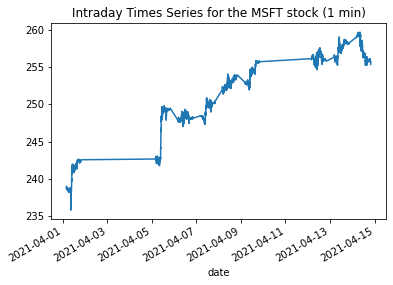

In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

In [9]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2021-04-14 19:50:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [11]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-04-14 19:50:00,255.38,255.38,255.38,255.38,1075.0
2021-04-14 19:49:00,255.65,255.65,255.41,255.41,1520.0
2021-04-14 19:48:00,255.65,255.65,255.65,255.65,299.0
2021-04-14 19:38:00,255.80,255.80,255.80,255.80,100.0
2021-04-14 19:28:00,255.65,255.65,255.65,255.65,105.0
